
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of generic asset classes and asset subclasses.  Construct portfolios of generic asset classes and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['asset-class-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,US Stocks,US Stocks,64.71,69.17,23.02,17.11,19.61,16.39,10.69,19.33,19.61,1.01
1,Global Stocks,Global Stocks,49.73,74.84,19.04,7.52,13.35,17.02,11.80,18.14,13.35,0.74
2,US Bonds,US Bonds,-5.86,-0.11,4.29,5.68,3.71,1.89,1.10,3.36,3.71,1.10
3,Global Bonds,Global Bonds,-10.64,-0.32,1.66,4.94,3.82,1.89,1.36,3.30,3.82,1.16
4,Cash Equivalents,Cash Equivalents,0.00,-0.03,0.20,1.33,0.98,0.12,0.08,0.28,0.98,3.50
5,Real Estate,Real Estate,144.42,36.23,-5.25,10.89,9.14,14.07,7.15,18.05,9.14,0.51
6,Commodities,Commodities,103.78,112.31,11.32,1.15,6.40,13.58,7.38,19.56,6.40,0.33
7,Currencies,Currencies,12.52,10.78,1.45,2.57,2.19,4.41,3.09,6.92,2.19,0.32
8,Balanced,Balanced,16.90,24.25,10.26,8.15,8.72,7.22,5.11,7.66,8.72,1.14
9,Risk-Free Asset,Risk-Free Asset,0.00,-0.03,0.20,1.33,0.98,0.12,0.08,0.28,0.98,3.50


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank

,Investment Option,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
21,US Stocks:Technology,US Stocks:Technology,117.91,72.23,38.23,30.66,30.96,19.14,10.29,21.03,30.96,1.47
13,US Stocks:Growth,US Stocks:Growth,111.91,83.09,44.62,29.38,29.46,19.89,11.73,20.09,29.46,1.47
14,US Stocks:Growth and Income,US Stocks:Growth and Income,50.13,49.91,18.70,16.21,18.88,15.95,10.59,18.30,18.88,1.03
37,US Bonds:Treasury Inflation-Protected Securities (TIPS),US Bonds:Treasury Inflation-Protected Securities (TIPS),6.62,9.33,8.96,6.56,4.54,2.35,1.10,3.71,4.54,1.22
2,US Bonds,US Bonds,-5.86,-0.11,4.29,5.68,3.71,1.89,1.10,3.36,3.71,1.10
33,US Bonds:High Yield,US Bonds:High Yield,13.56,16.86,5.01,6.23,9.10,3.50,1.86,9.45,9.10,0.96
9,Risk-Free Asset,Risk-Free Asset,0.00,-0.03,0.20,1.33,0.98,0.12,0.08,0.28,0.98,3.50
43,Real Estate:REIT,Real Estate:REIT,138.63,28.10,-7.21,10.23,10.00,13.98,6.56,17.93,10.00,0.56
5,Real Estate,Real Estate,144.42,36.23,-5.25,10.89,9.14,14.07,7.15,18.05,9.14,0.51
44,Real Estate:Real Estate Funds,Real Estate:Real Estate Funds,144.42,36.23,-5.25,10.89,9.14,14.07,7.15,18.05,9.14,0.51


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# Put your "age" in bonds and the rest in stocks
age_portfolio = {
    'Title': 'Age Portfolio',
    'US Stocks': 0.50,
    'US Bonds': 0.50
}

# Put your "age" in Short Term Treasuries and the rest in stocks
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'US Stocks': 0.50,
    'Cash Equivalents:Treasury Bills': 0.50
}

# Top Dogs - top performer by sharpe ratio in each Asset Class, equal weights
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'US Stocks:Technology': 1/10,
    'US Bonds:Treasury Inflation-Protected Securities (TIPS)': 1/10,
    'Risk-Free Asset': 1/10,
    'Real Estate:REIT': 1/10,
    'Global Stocks:Emerging Markets': 1/10,
    'Global Bonds': 1/10,
    'Currencies:Chinese Yuan': 1/10,
    'Commodities:Palladium': 1/10,
    'Cash Equivalents': 1/10,
    'Balanced:Conservative Allocation (30/70)': 1/10
}

# 50% S&P 500, 50% bonds
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'US Stocks': 1/2,
    'US Bonds': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'US Stocks:Large Cap': 1/3,
    'US Bonds': 1/3,
    'US Bonds:Investment Grade': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'US Stocks:Large Cap': 1/4,
    'US Stocks:Growth': 1/4,
    'US Stocks:Technology': 1/4,
    'Global Stocks': 1/4 
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account)
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'US Stocks:Large Cap': 0.90,
    'Cash Equivalents:Treasury Bills': 0.10
}

# Janet Yellen: 50% fixed income, 40% S&P500, 10% cash
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'US Bonds:Investment Grade': 0.50,
    'US Stocks:Large Cap': 0.40,
    'Cash Equivalents:Money Markets': 0.10
}

# Risk Off: 100% fixed income divided between risk free asset, bond fund, and money market 
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'Cash Equivalents:Treasury Bills': 1/3,
    'US Bonds': 1/3,
    'Cash Equivalents:Money Markets': 1/3
}

# Risk On: 100% US stocks bevided between large, emerging markets, and small cap
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'US Stocks:Large Cap': 1/3,
    'Global Stocks:Emerging Markets':1/3,
    'US Stocks:Small Cap': 1/3
}

# Everything Ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',
    'US Stocks:Technology': 1/8,
    'US Stocks:Growth': 1/8,
    'Real Estate:REIT': 1/8,
    'Currencies:Japanese Yen': 1/8,
    'Currencies:Chinese Yuan': 1/8,
    'US Bonds': 1/8,
    'US Bonds:Investment Grade': 1/8,
    'US Bonds:High Yield': 1/8
}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = age_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': 'Equal',
                          'US Stocks': 1/2},
    'Asset Subclass':    {'weight_by': None,
                          'US Bonds:High Yield': 1/2},
    'Investment Option': {'weight_by': 'Sharpe Ratio'},
}
weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,US Stocks,US Bonds,Age Portfolio
Annual Returns,19.61,3.71,11.66
Std Dev,19.33,3.36,10.07
Sharpe Ratio,1.01,1.10,1.16
Weight,0.50,0.50,1.00
Worst Typical Down Year,-19.05,-3.01,-8.48
Black Swan,-38.38,-6.37,-18.55


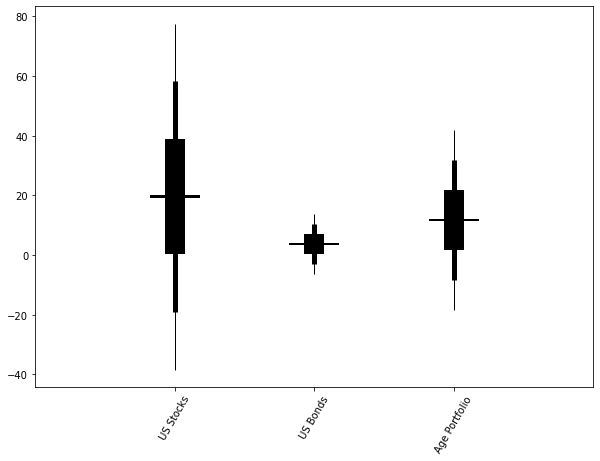

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

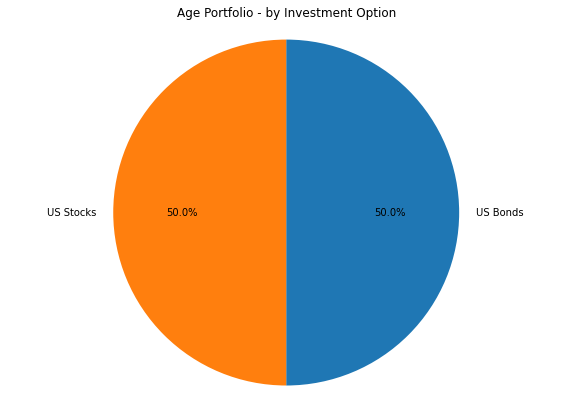

US Bonds    0.50
US Stocks   0.50



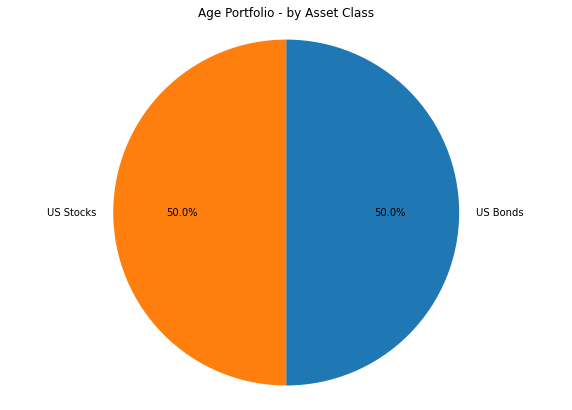

US Bonds    0.50
US Stocks   0.50



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Class'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Age Portfolio Weights:
    US Stocks                      0.5000
    US Bonds                       0.5000


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -20
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer.....

Age Portfolio Metrics:              
    max_sharpe_ratio            1.31
    annual_return               8.00
    std_dev                     6.11
    worst typical down year    -4.22
    black_swan                -10.33


Age Portfolio Weights:
    US Stocks                      0.2700
    US Bonds                       0.7300



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).